In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

In [169]:
batch_size = 128
output_count = 10
epochs = 8
#training and test data split
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Normalization between 0 and 1
x_train = x_train/255
x_test = x_test/255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')
#converting output vectors to one hot encoding
y_train = keras.utils.to_categorical(y_train,output_count)
y_test = keras.utils.to_categorical(y_test,output_count)

60000 train samples
10000 test samples


Label [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


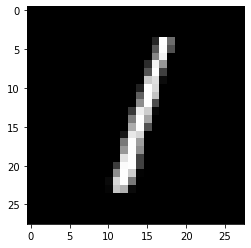

In [170]:
#visualizing some random data
print("Label", y_test[2:3])
plt.imshow(x_test[2:3].reshape(28,28),cmap="gray")
plt.show()

In [171]:
#Model - design
layer_size_1 = 32
model = Sequential()
model.add(Dense(layer_size_1,activation="sigmoid",input_shape=(784,)))
model.add(Dense(32,activation="sigmoid"))
model.add(Dense(32,activation="sigmoid"))
model.add(Dense(output_count,activation="softmax"))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_46 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_47 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_48 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [172]:
#compililation
model.compile(optimizer=RMSprop(),loss="categorical_crossentropy",metrics=['accuracy'])

#Training
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/8
60000/60000 [==============================] - 3s 51us/step - loss: 1.6596 - acc: 0.4857
Epoch 2/8
60000/60000 [==============================] - 3s 43us/step - loss: 0.7417 - acc: 0.8104
Epoch 3/8
60000/60000 [==============================] - 2s 40us/step - loss: 0.4022 - acc: 0.8957
Epoch 4/8
60000/60000 [==============================] - 2s 40us/step - loss: 0.2945 - acc: 0.9200
Epoch 5/8
60000/60000 [==============================] - 2s 38us/step - loss: 0.2445 - acc: 0.9325
Epoch 6/8
60000/60000 [==============================] - 2s 41us/step - loss: 0.2128 - acc: 0.9413
Epoch 7/8
60000/60000 [==============================] - 3s 42us/step - loss: 0.1903 - acc: 0.9473
Epoch 8/8
60000/60000 [==============================] - 2s 41us/step - loss: 0.1732 - acc: 0.9515


In [173]:
#Testing
score = model.evaluate(x_test,y_test,verbose=0)
print("loss - test :",score[0])
print("accuracy - test :",score[1])

loss - test : 0.17471441623270512
accuracy - test : 0.9516


In [174]:
#Prediction
prediction = model.predict(x_test[2:3])
prediction  = prediction[0]
print("prediction\n",(prediction>0.5)*1)

prediction
 [0 1 0 0 0 0 0 0 0 0]


[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


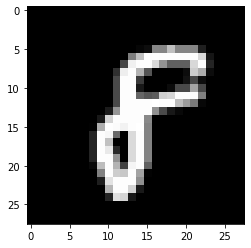

In [181]:
#Another Prediction
plt.imshow(x_test[355:356].reshape(28,28), cmap="gray")
print(y_test[355:356])

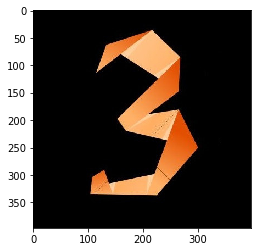

In [193]:
#Custom input
import cv2
import numpy as np
from matplotlib import pyplot as plt


#load number image
#!pwd
#!mkdir input_image
image_bgr = cv2.imread('/content/input_image/digit.jpg',cv2.IMREAD_COLOR)
#convetging to rgb
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)

#display image
plt.imshow(image_rgb)

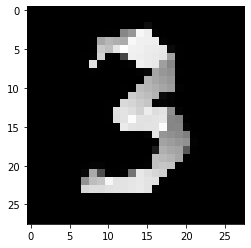

In [187]:
#convert image as grayscale
image = cv2.imread('/content/input_image/digit.jpg',cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image,(28,28))
plt.imshow(image_resized,cmap="gray")

In [188]:
#custom input prediction
input_prediction = model.predict(image_resized.reshape(1,784))
print("prediction score :\n",input_prediction[0])
threshold = (input_prediction>0.5)*1
print(threshold[0])
print(np.where(threshold==1)[1][0])

prediction score :
 [1.7670862e-05 1.6514390e-03 1.6721882e-03 9.8811650e-01 3.3254887e-06
 3.0000901e-03 3.6583551e-06 3.5300684e-05 5.3858436e-03 1.1398460e-04]
[0 0 0 1 0 0 0 0 0 0]
3
